## CRIME IN LA

Perform Descriptive Analytics on the Crime Dataset to observe the trends in LA area. Then based on the observations, predict the possibility of crime occuring in the majorly affected areas.

## PROBLEM STATEMENT

Will a crime occur in the areas that are most affected in LA?

In [1]:
#import packages needed for the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection
import statsmodels.api as smf

## DATA EXPLORATION

In [2]:
#load the csv file
#Link for the dataset : https://www.kaggle.com/cityofLA/crime-in-los-angeles#Crime_Data_2010_2017.csv
df = pd.read_csv('G:/analytics systems technology/LACrime/Crime_Data_2010_2017.csv')

In [3]:
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584316 entries, 0 to 1584315
Data columns (total 26 columns):
DR Number                 1584316 non-null int64
Date Reported             1584316 non-null object
Date Occurred             1584316 non-null object
Time Occurred             1584316 non-null int64
Area ID                   1584316 non-null int64
Area Name                 1584316 non-null object
Reporting District        1584316 non-null int64
Crime Code                1584316 non-null int64
Crime Code Description    1583904 non-null object
MO Codes                  1412557 non-null object
Victim Age                1455657 non-null float64
Victim Sex                1439117 non-null object
Victim Descent            1439084 non-null object
Premise Code              1584240 non-null float64
Premise Description       1581565 non-null object
Weapon Used Code          524757 non-null float64
Weapon Description        524756 non-null object
Status Code               1584314 non-nul

In [5]:
df.isnull().sum()

DR Number                       0
Date Reported                   0
Date Occurred                   0
Time Occurred                   0
Area ID                         0
Area Name                       0
Reporting District              0
Crime Code                      0
Crime Code Description        412
MO Codes                   171759
Victim Age                 128659
Victim Sex                 145199
Victim Descent             145232
Premise Code                   76
Premise Description          2751
Weapon Used Code          1059559
Weapon Description        1059560
Status Code                     2
Status Description              0
Crime Code 1                    7
Crime Code 2              1484319
Crime Code 3              1582133
Crime Code 4              1584247
Address                         0
Cross Street              1321583
Location                        9
dtype: int64

## Descriptive Analytics

In [6]:
# Select the Columns with Victim's Age, Sex and Descent.
victim = df[['Victim Age', 'Victim Sex', 'Victim Descent']]

C:\Users\anush\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


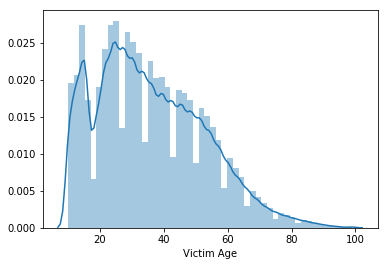

In [7]:
#remove the missing values
sns.distplot(victim['Victim Age'].dropna())

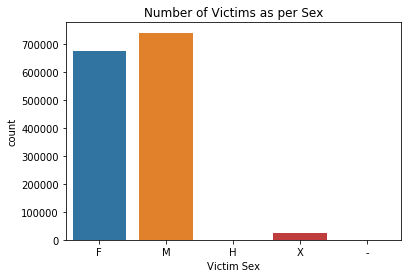

In [8]:
# Seaborns Count Plot
plt.title('Number of Victims as per Sex')
sns.countplot('Victim Sex', data=victim)

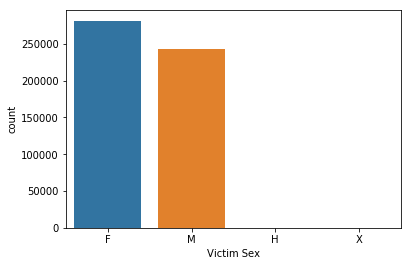

In [9]:
# Number of Victims according to Sex of the Victim b/w the age group 20 and 35 years
sns.countplot('Victim Sex', data=victim[(victim['Victim Age'] >= 20) & (victim['Victim Age'] <= 35)])

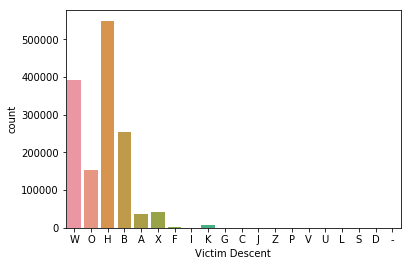

In [10]:
#Countplot according to the Victim's Descent
sns.countplot('Victim Descent', data=victim)

In [11]:
# Area ID, Area Name and Reporting District.
area = df[['Area ID', 'Area Name', 'Reporting District']]

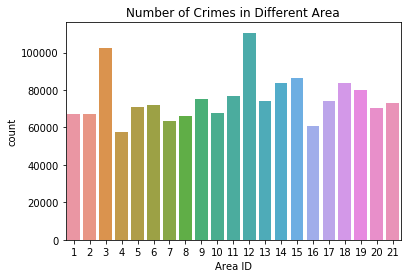

In [12]:
# Which area have more Crime.
plt.title('Number of Crimes in Different Area')
sns.countplot(x='Area ID', data=area)

In [13]:
# Crime Code and it's Description
crime = df[['Crime Code', 'Crime Code Description','Status Description','Weapon Description','Premise Description']]

In [14]:
#Top 10 crimes
crime['Crime Code Description'].value_counts()[:10]

BATTERY - SIMPLE ASSAULT                                        145767
VEHICLE - STOLEN                                                121329
BURGLARY FROM VEHICLE                                           121318
BURGLARY                                                        114751
THEFT PLAIN - PETTY ($950 & UNDER)                              113709
THEFT OF IDENTITY                                               100653
INTIMATE PARTNER - SIMPLE ASSAULT                                85908
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114     79433
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                         71523
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                   67631
Name: Crime Code Description, dtype: int64

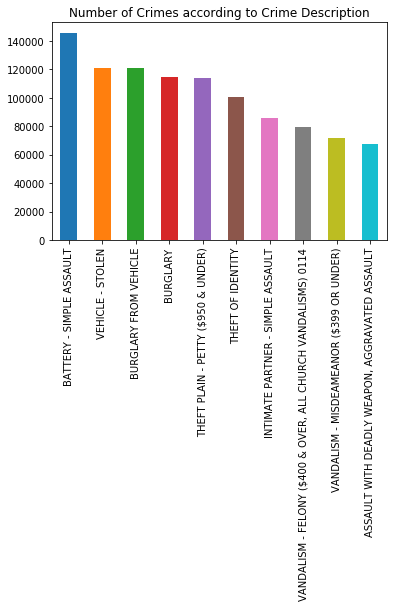

In [15]:
#Plot of the top 10 crimes
plt.title('Number of Crimes according to Crime Description')
crime['Crime Code Description'].value_counts()[:10].plot(kind='bar')

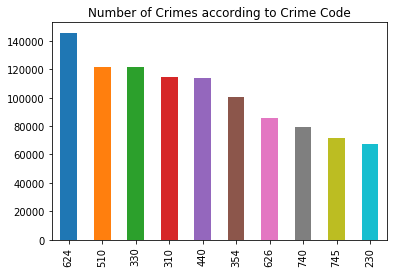

In [16]:
#Plot of the top 10 crimes according to their crime code
plt.title('Number of Crimes according to Crime Code')
crime['Crime Code'].value_counts()[:10].plot(kind='bar')

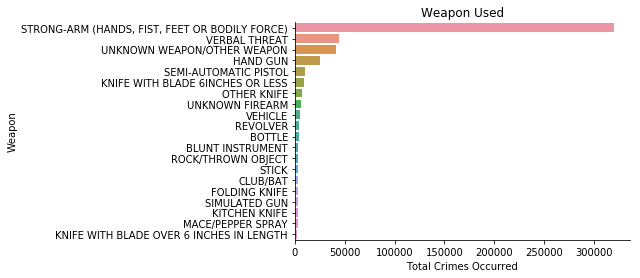

In [17]:
fig, ax = plt.subplots()

# Plotting weapons used
sns.barplot(y=crime["Weapon Description"].value_counts().head(20).index,
                 x=crime["Weapon Description"].value_counts().head(20), ax=ax)

# Axes
ax.set_title("Weapon Used")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Weapon")
sns.despine()

In [18]:
#Top 5 areas of crime
crime["Premise Description"].value_counts().head(5)

STREET                                          352160
SINGLE FAMILY DWELLING                          328198
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    204980
PARKING LOT                                     112576
SIDEWALK                                         79247
Name: Premise Description, dtype: int64

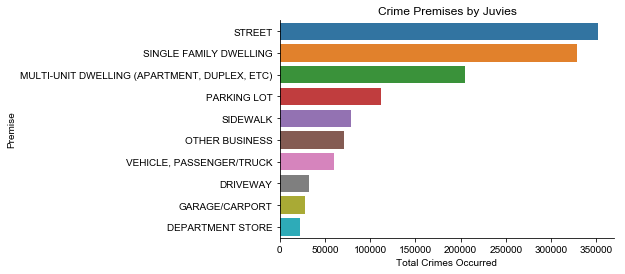

In [19]:
fig, ax = plt.subplots()

# Top 10 premises of crime by a juvie
ax = sns.barplot(y=crime["Premise Description"].value_counts().head(10).index,
                 x=crime["Premise Description"].value_counts().head(10))

# Axes
sns.set_style("whitegrid")
ax.set_title("Crime Premises by Juvies")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Premise")
sns.despine()

In [20]:
area_crime = pd.concat(objs=[area, crime], axis=1)

In [21]:
print ("Number of Crimes in Area ID 12 i.e 77th Street", len(area_crime[(area_crime['Area ID'] == 12)]))
print ("Number of Crimes in Area ID 3 i.e Southwest", len(area_crime[(area_crime['Area ID'] == 3)]))

Number of Crimes in Area ID 12 i.e 77th Street 110605
Number of Crimes in Area ID 3 i.e Southwest 102259


In [22]:
# Select the Area with the ID 12 and 3 Respectively.
area_crime_12 = area_crime[(area_crime['Area ID'] == 12)]
area_crime_3 = area_crime[(area_crime['Area ID'] == 3)]

In [23]:
area_crime_12['Crime Code Description'].value_counts()[:10]

BATTERY - SIMPLE ASSAULT                          12208
VEHICLE - STOLEN                                   9831
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     8959
ROBBERY                                            7840
BURGLARY                                           7790
INTIMATE PARTNER - SIMPLE ASSAULT                  7146
BURGLARY FROM VEHICLE                              5866
VANDALISM - MISDEAMEANOR ($399 OR UNDER)           5361
THEFT PLAIN - PETTY ($950 & UNDER)                 5275
THEFT OF IDENTITY                                  5146
Name: Crime Code Description, dtype: int64

In [24]:
area_crime_3['Crime Code Description'].value_counts()[:10]

BATTERY - SIMPLE ASSAULT                          11196
THEFT PLAIN - PETTY ($950 & UNDER)                 9730
VEHICLE - STOLEN                                   7085
BURGLARY                                           6920
BURGLARY FROM VEHICLE                              6026
INTIMATE PARTNER - SIMPLE ASSAULT                  5624
ROBBERY                                            5621
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT     5501
THEFT OF IDENTITY                                  5174
VANDALISM - MISDEAMEANOR ($399 OR UNDER)           4825
Name: Crime Code Description, dtype: int64

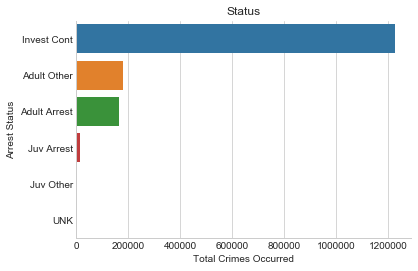

In [25]:
fig, ax = plt.subplots()

# Plotting the arrest status
sns.barplot(y=crime["Status Description"].value_counts().index,
                 x=crime["Status Description"].value_counts(), ax=ax)

# Axes
ax.set_title("Status")
ax.set_xlabel("Total Crimes Occurred")
ax.set_ylabel("Arrest Status")
sns.despine()

In [26]:
#correlation matrix
df.corr()

,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Code,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4
DR Number,1.000000,-0.007390,0.016191,0.016248,-0.009166,0.007397,-0.015414,0.000441,-0.009321,-0.099782,-0.010357,0.036429
Time Occurred,-0.007390,1.000000,0.011809,0.012023,0.017712,-0.049945,-0.095394,-0.002821,0.017759,0.007710,0.005377,-0.088805
Area ID,0.016191,0.011809,1.000000,0.998998,-0.004587,0.009835,0.014475,-0.000490,-0.004650,-0.046569,-0.026894,0.012957
Reporting District,0.016248,0.012023,0.998998,1.000000,-0.004624,0.010262,0.014411,-0.000368,-0.004686,-0.045945,-0.024548,0.012456
Crime Code,-0.009166,0.017712,-0.004587,-0.004624,1.000000,-0.034478,0.098754,0.432260,0.999638,0.059313,0.092420,0.030399
Victim Age,0.007397,-0.049945,0.009835,0.010262,-0.034478,1.000000,0.167376,0.074359,-0.034394,-0.002280,-0.071872,-0.106784
Premise Code,-0.015414,-0.095394,0.014475,0.014411,0.098754,0.167376,1.000000,0.216194,0.098761,-0.036025,-0.069356,0.170824
Weapon Used Code,0.000441,-0.002821,-0.000490,-0.000368,0.432260,0.074359,0.216194,1.000000,0.432594,-0.095010,0.022898,-0.048323
Crime Code 1,-0.009321,0.017759,-0.004650,-0.004686,0.999638,-0.034394,0.098761,0.432594,1.000000,0.069727,0.124671,0.021249
Crime Code 2,-0.099782,0.007710,-0.046569,-0.045945,0.059313,-0.002280,-0.036025,-0.095010,0.069727,1.000000,0.255056,0.267714


## PREDICTIVE ANALYTICS

In [27]:
df_use=df[['Time Occurred']+['Area ID']+['Reporting District']+['Crime Code']+
          ['Victim Sex']+['Victim Age']+['Victim Descent']+['Premise Code']+['Weapon Used Code']]

In [28]:
df_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584316 entries, 0 to 1584315
Data columns (total 9 columns):
Time Occurred         1584316 non-null int64
Area ID               1584316 non-null int64
Reporting District    1584316 non-null int64
Crime Code            1584316 non-null int64
Victim Sex            1439117 non-null object
Victim Age            1455657 non-null float64
Victim Descent        1439084 non-null object
Premise Code          1584240 non-null float64
Weapon Used Code      524757 non-null float64
dtypes: float64(3), int64(4), object(2)
memory usage: 108.8+ MB


In [29]:
#fill up the missing values for the categorical data
df_use['Victim Sex'] = df_use['Victim Sex'].fillna('NaN')
df_use['Victim Descent'] = df_use['Victim Descent'].fillna('NaN')

C:\Users\anush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\anush\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
#fill up the missing values for numeric data
df_use['Victim Age'] = df_use['Victim Age'].fillna(0)
df_use['Premise Code'] = df_use['Premise Code'].fillna(0)
df_use['Weapon Used Code'] = df_use['Weapon Used Code'].fillna(0)

C:\Users\anush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\anush\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\anush\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [31]:
#define OUTPUT LABEL based on area ID
df_use['OUTPUT_LABEL'] = (df_use['Area ID'] == 12).astype('int') | (df_use['Area ID'] == 3).astype('int')

C:\Users\anush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
#final dataframe to be used for prediction
df_final=df_use[['Time Occurred']+['Area ID']+['Reporting District']+['Crime Code']
         +['Victim Age']+['Victim Descent']+['Premise Code']+['Weapon Used Code']+['OUTPUT_LABEL']]
df_final.head()

,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Victim Descent,Premise Code,Weapon Used Code,OUTPUT_LABEL
0,1800,12,1241,626,30.0,W,502.0,400.0,1
1,2300,20,2071,510,0.0,NaN,101.0,0.0,0
2,2030,18,1823,510,12.0,NaN,101.0,0.0,0
3,1800,18,1803,510,0.0,NaN,101.0,0.0,0
4,2300,21,2133,745,84.0,W,501.0,0.0,0


## Numerical Features

In [33]:
df_final[['Time Occurred']+['Victim Age']+['Reporting District']+['Crime Code']
         +['Premise Code']+['Weapon Used Code']+['OUTPUT_LABEL']].head()

,Time Occurred,Victim Age,Reporting District,Crime Code,Premise Code,Weapon Used Code,OUTPUT_LABEL
0,1800,30.0,1241,626,502.0,400.0,1
1,2300,0.0,2071,510,101.0,0.0,0
2,2030,12.0,1823,510,101.0,0.0,0
3,1800,0.0,1803,510,101.0,0.0,0
4,2300,84.0,2133,745,501.0,0.0,0


In [34]:
cols_num = ['Time Occurred','Victim Age','Reporting District','Crime Code','Premise Code','Weapon Used Code']
cols_num

['Time Occurred',
 'Victim Age',
 'Reporting District',
 'Crime Code',
 'Premise Code',
 'Weapon Used Code']

In [35]:
df_final[cols_num].isnull().sum()

Time Occurred         0
Victim Age            0
Reporting District    0
Crime Code            0
Premise Code          0
Weapon Used Code      0
dtype: int64

## Categorical Features

In [36]:
cols_cat=['Victim Descent']

In [37]:
df_cat = pd.get_dummies(df_use[cols_cat],drop_first = True)
df_cat.head()

,Victim Descent_A,Victim Descent_B,Victim Descent_C,Victim Descent_D,Victim Descent_F,Victim Descent_G,Victim Descent_H,Victim Descent_I,Victim Descent_J,Victim Descent_K,Victim Descent_L,Victim Descent_NaN,Victim Descent_O,Victim Descent_P,Victim Descent_S,Victim Descent_U,Victim Descent_V,Victim Descent_W,Victim Descent_X,Victim Descent_Z
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
df = pd.concat([df_final,df_cat], axis = 1)

In [39]:
cols_all_cat = list(df_cat.columns)
print('number of categorical:',len(cols_all_cat))

number of categorical: 20


## Engineering Features Summary

In [40]:
cols_input = cols_num + cols_all_cat

In [41]:
df_data = df[cols_input + ['OUTPUT_LABEL']]
df_data.head()

,Time Occurred,Victim Age,Reporting District,Crime Code,Premise Code,Weapon Used Code,Victim Descent_A,Victim Descent_B,Victim Descent_C,Victim Descent_D,...,Victim Descent_NaN,Victim Descent_O,Victim Descent_P,Victim Descent_S,Victim Descent_U,Victim Descent_V,Victim Descent_W,Victim Descent_X,Victim Descent_Z,OUTPUT_LABEL
0,1800,30.0,1241,626,502.0,400.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2300,0.0,2071,510,101.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2030,12.0,1823,510,101.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1800,0.0,1803,510,101.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2300,84.0,2133,745,501.0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## Building Training and Test Samples

In [42]:
#shuffle the samples
df_data = df_data.sample(n = len(df_data))
df_data = df_data.reset_index(drop = True)

In [43]:
# Save 30% of the data as validation and test data 
df_test=df_data.sample(frac=0.30)
print('Split size: %.3f'%(len(df_test)/len(df_data)))

Split size: 0.300


In [44]:
# use the rest of the data as training data
df_train_all=df_data.drop(df_test.index)

## Prepare the Data

In [45]:
# split the training data into positive and negative
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos))],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train)).reset_index(drop = True)

In [62]:
#This is defined for calculating Prevalance.
def calc_prevalence(y_actual):
    return (sum(y_actual)/len(y_actual))

In [46]:
col2use = [c for c in list(df_train_all.columns) if c != 'OUTPUT_LABEL']
print(len(col2use))

26


In [47]:
X_train = df_train[col2use].values
X_train_all = df_train_all[col2use].values

y_train = df_train['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape)
print('Training shapes:',X_train.shape, y_train.shape)

Training All shapes: (1109021, 26)
Training shapes: (298268, 26) (298268,)


In [48]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [49]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [50]:
scaler = pickle.load(open(scalerfile, 'rb'))

In [51]:
X_train_tf = scaler.transform(X_train)

In [52]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print(' ')
    return auc, accuracy, recall, precision, specificity 

In [53]:
thresh = 0.5

## Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6)
rf.fit(X_train_tf, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [55]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)

Random Forest
Training:
AUC:0.969
accuracy:0.914
recall:0.974
precision:0.870
specificity:0.854
 


## Test the model

In [56]:
#create X and Y matrix
X_test = df_test[col2use].values
y_test = df_test['OUTPUT_LABEL'].values

#transform our data matrices
X_test_tf = scaler.transform(X_test)

In [57]:
pickle.dump(rf, open('best_classifier.pkl', 'wb'),protocol = 4)

In [58]:
import pickle
# load the model
best_model = pickle.load(open('best_classifier.pkl','rb'))

In [59]:
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [60]:
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Test:
AUC:0.969
accuracy:0.871
recall:0.974
precision:0.509
specificity:0.855
 


In [61]:
mse_error = np.mean((y_train_preds-y_train) ** 2)
print(mse_error)
mse_error2=np.mean((y_test_preds-y_test)**2)
print(mse_error2)

0.10393927536674834
0.11310657927506981
